<a href="https://colab.research.google.com/github/Vande7/Vande7/blob/main/WK_7_INT_M_Project_Elijah_Vande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Elijah Vande

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

## <br> Importing libraries, modules and packages here. <br>

##  A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs.



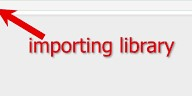

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# pandas settings for displaying rows, columns and column_width
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
# %load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

### **Project Objectives**

## **1 Build a machine learning model that predicts the salary.**
## **2.Evaluate the performance of the model using at least three (3) performance metrics.**

## Begiining of the project


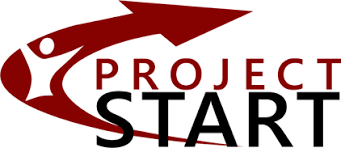

## Loading the data and viewing its first five rows 

In [2]:
# Loading the data and displaying its first five rows
data = pd.read_csv("/content/salary.csv")
data.head(5)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Checking the shape of the data, that is how many rows and columns are there in the dataset

In [3]:
# Checking the shape of the data
data.shape

(32560, 15)

## Checking the statistical descriptions (mean, median, mode etc.) of the numerical variables of the data

In [4]:
# Viewing the statistics of the numeric variables
data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Checking for missing values in the dataset

In [5]:
# Checking for missing values
data.isnull().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

## The data set has no missing values

## Checking the percentages of the salaries less than 50k and greater than 50k

In [6]:
# Checking the value counts of the Salalry column
data["Salary"].value_counts(normalize=True).mul(100)

 <=50K    75.918305
 >50K     24.081695
Name: Salary, dtype: float64

**Encoding the 'Salary' column**
## Converting the categorical variable(salary) to a number for Machine Learning Model Building

In [7]:

# Encoding the 'Salary' column
le = LabelEncoder()
data['Salary'] = le.fit_transform(data['Salary'])

## Here we are storing the encoded salary values in an empty dictionary for later use

In [8]:


# Store the encoder for later use
encoder_dict = {}
encoder_dict['Salary'] = le

## Dropping the unncessary columns,"Education", "Relationship", "Country"

## because they are not important for our project analysis and objective

In [9]:

# Droping unnecessary columns
data.drop(['Education', 'Relationship', 'Country'], axis=1, inplace=True)

## Here we are also encoding (converting to numerical values for machine learning model) the other categorical variables ['Workclass', 'Marital_status', 'Occupation', 'Race', 'Sex']

In [10]:

# Encode categorical variables
cat_cols = ['Workclass', 'Marital_status', 'Occupation', 'Race', 'Sex']
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoder_dict[col] = le

## Dividing the dataset into training and testing sets with a training size of 80% and testing size of 20%

That is, 80% of the data will be used for training the machine model while 20% of the data will be used for testing the model

In [11]:

# Split the dataset into training and testing sets
X = data.drop('Salary', axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building a machine learning model using RandomForestClassifier()

In [12]:

# Choose a machine learning algorithm and fit the training data to the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Here we are using the built, trained model to make predictions on the testing data

In [13]:

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

## Coverting the numerical labels back to categorical labels using the encoder

In [14]:



# Convert the numeric labels back to non-numeric labels using the encoder
y_test = encoder_dict['Salary'].inverse_transform(y_test)
y_pred = encoder_dict['Salary'].inverse_transform(y_pred)

### **Evaluating the performance of the model using at least three performance metrics**

**Performance Metrics One**
## Evaluating the performance of the model using accuracy score

In [15]:
# Evaluating the performance of the model using accuracy score
acc = accuracy_score(y_test, y_pred)
acc

0.8561117936117936

**Performance Metrics Two**
## Evaluating the performance of the model using precision score

In [16]:
# Evaluating the performance of the model using precision score
prec = precision_score(y_test, y_pred, pos_label=' >50K')
prec

0.748314606741573

**Performance Metrics Three**
## Evaluating the performance of the model using recall score

In [17]:
# Evaluating the performance of the model using recall score
rec = recall_score(y_test, y_pred, pos_label=' >50K')
rec

0.624375

**Performance Metrics Four**
## Evaluating the performance of the model using f1 score

In [18]:
# Evaluating the performance of the model using f1 score
f1 = f1_score(y_test, y_pred, pos_label=' >50K')
f1

0.6807495741056219

## Conclusion

A machine learning model was built using RandomForestClassifier()


The model's performance was evaluated using different performace metrics as can be seen above. 

The best performance metric is Accuracy score (0.8545761670761671),
 followed by
  precision score (0.7402501839587933). 
  Recall score (0.62875) has the least performance score